# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lats = []
lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats_ran = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs_ran = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# Identify nearest city for each lat, lng combination
for lat_lng in zip(lats_ran, lngs_ran):
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lats.append(lat_lng[0])
        lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Set Units
units  ='metric'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
         
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[i]}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Append the City information into city_data list
        city_data.append({"City": city_weather['name'],
                          "Lat":city_weather['coord']['lat'],
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | houma
Processing Record 4 of Set 1 | vung tau
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kamyaran
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | sola
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | gorele
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | antofagasta
Processing Record 23 of Set 1 | taolanaro
City not found. Skipping..

Processing Record 41 of Set 4 | muisne
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | gorontalo
Processing Record 44 of Set 4 | mitsamiouli
Processing Record 45 of Set 4 | chanasma
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | lithakia
Processing Record 48 of Set 4 | uvalde
Processing Record 49 of Set 4 | bargal
City not found. Skipping...
Processing Record 0 of Set 5 | kushmurun
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | faya
Processing Record 3 of Set 5 | itaituba
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | sakaiminato
Processing Record 6 of Set 5 | tafresh
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | cayenne
Processing Record 9 of Set 5 | andenes
Processing Record 10 of Set 5 | marcona
City not found. Skipping...
Processing Record 11 of Set 5 | la ronge
Processing Record 12 of Set 5

Processing Record 29 of Set 8 | guerrero negro
Processing Record 30 of Set 8 | angangueo
Processing Record 31 of Set 8 | warrington
Processing Record 32 of Set 8 | northam
Processing Record 33 of Set 8 | alekseyevsk
Processing Record 34 of Set 8 | vanderhoof
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | yambio
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | nipawin
Processing Record 40 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 41 of Set 8 | obihiro
Processing Record 42 of Set 8 | natchez
Processing Record 43 of Set 8 | norman wells
Processing Record 44 of Set 8 | tiznit
Processing Record 45 of Set 8 | cahors
Processing Record 46 of Set 8 | kaniama
Processing Record 47 of Set 8 | udala
Processing Record 48 of Set 8 | xai-xai
Processing Record 49 of Set 8 | mujiayingzi
Processing Record 0 of Set 9 | puerto madryn
Processing Record 1 of Set 9 | nongstoin
Process

Processing Record 16 of Set 12 | biskamzha
Processing Record 17 of Set 12 | egvekinot
Processing Record 18 of Set 12 | namatanai
Processing Record 19 of Set 12 | flinders
Processing Record 20 of Set 12 | kurumkan
Processing Record 21 of Set 12 | kruisfontein
Processing Record 22 of Set 12 | san patricio
Processing Record 23 of Set 12 | alyangula
Processing Record 24 of Set 12 | san vicente
Processing Record 25 of Set 12 | stephenville
Processing Record 26 of Set 12 | dinsor
City not found. Skipping...
Processing Record 27 of Set 12 | ust-tsilma
Processing Record 28 of Set 12 | yeppoon
Processing Record 29 of Set 12 | norrtalje
Processing Record 30 of Set 12 | luau
Processing Record 31 of Set 12 | zhuhai
Processing Record 32 of Set 12 | merauke
Processing Record 33 of Set 12 | boueni
Processing Record 34 of Set 12 | craigieburn
Processing Record 35 of Set 12 | roald
Processing Record 36 of Set 12 | gondanglegi
Processing Record 37 of Set 12 | sioux lookout
Processing Record 38 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,10.45,62,72,4.18,NZ,1670276941
1,Vardø,70.3705,31.1107,-3.01,86,75,3.09,NO,1670276825
2,Houma,29.5958,-90.7195,25.00,90,75,3.09,US,1670277080
3,Vung Tau,10.3460,107.0843,25.39,87,88,3.61,VN,1670277080
4,Mataura,-46.1927,168.8643,10.27,90,97,1.57,NZ,1670277038


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bluff,-46.6000,168.3333,10.45,62,72,4.18,NZ,1670276941
1,Vardø,70.3705,31.1107,-3.01,86,75,3.09,NO,1670276825
2,Houma,29.5958,-90.7195,25.00,90,75,3.09,US,1670277080
3,Vung Tau,10.3460,107.0843,25.39,87,88,3.61,VN,1670277080
4,Mataura,-46.1927,168.8643,10.27,90,97,1.57,NZ,1670277038


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

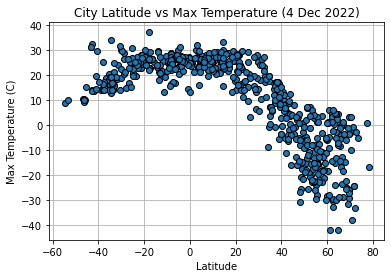

In [11]:
# Build scatter plot for latitude vs. temperature
x_val = city_data_df['Lat']
y_val = city_data_df['Max Temp']

fig1, ax1 = plt.subplots()

ax1.plot(x_val,y_val, marker='o', markeredgecolor='black', linewidth =0)

# Incorporate the other graph properties
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (C)")
ax1.set_title("City Latitude vs Max Temperature (4 Dec 2022)")
ax1.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

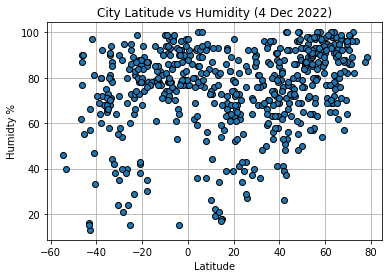

In [12]:
# Build the scatter plots for latitude vs. humidity
x_val = city_data_df['Lat']
y_val = city_data_df['Humidity']

fig2, ax2 = plt.subplots()

ax2.plot(x_val,y_val, marker='o', markeredgecolor='black', linewidth =0)

# Incorporate the other graph properties
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidty %")
ax2.set_title("City Latitude vs Humidity (4 Dec 2022)")
ax2.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

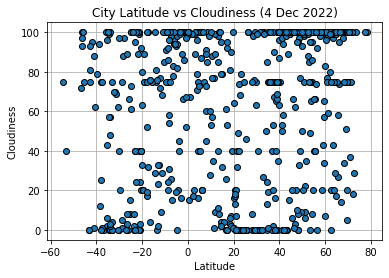

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_val = city_data_df['Lat']
y_val = city_data_df['Cloudiness']

fig3, ax3 = plt.subplots()

ax3.plot(x_val,y_val, marker='o', markeredgecolor='black', linewidth =0)

# Incorporate the other graph properties
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness")
ax3.set_title("City Latitude vs Cloudiness (4 Dec 2022)")
ax3.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

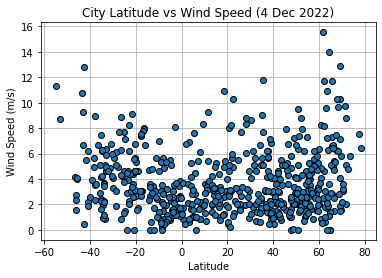

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_val = city_data_df['Lat']
y_val = city_data_df['Wind Speed']

fig2, ax2 = plt.subplots()

ax2.plot(x_val,y_val, marker='o', markeredgecolor='black', linewidth =0)

# Incorporate the other graph properties
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Wind Speed (m/s)")
ax2.set_title("City Latitude vs Wind Speed (4 Dec 2022)")
ax2.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linreg(x_values,y_values,x_label,y_label,title,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Vardø,70.3705,31.1107,-3.01,86,75,3.09,NO,1670276825
2,Houma,29.5958,-90.7195,25.00,90,75,3.09,US,1670277080
3,Vung Tau,10.3460,107.0843,25.39,87,88,3.61,VN,1670277080
6,Jamestown,42.0970,-79.2353,7.80,26,0,4.63,US,1670277025
7,Kāmyārān,34.7956,46.9355,3.56,70,19,1.74,IR,1670277081


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bluff,-46.6000,168.3333,10.45,62,72,4.18,NZ,1670276941
4,Mataura,-46.1927,168.8643,10.27,90,97,1.57,NZ,1670277038
5,Ushuaia,-54.8000,-68.3000,8.81,46,75,11.32,AR,1670277039
8,Puerto Ayora,-0.7393,-90.3518,24.98,89,52,2.68,EC,1670277018
9,Lüderitz,-26.6481,15.1594,15.97,69,3,8.84,NaN,1670277022


###  Temperature vs. Latitude Linear Regression Plot

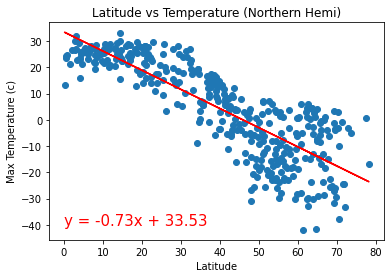

The r-squared is: 0.6900439149968915


In [19]:
# Linear regression on Northern Hemisphere

x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temperature (c)'
title = 'Latitude vs Temperature (Northern Hemi)'
x_loc = 0
y_loc = -40

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

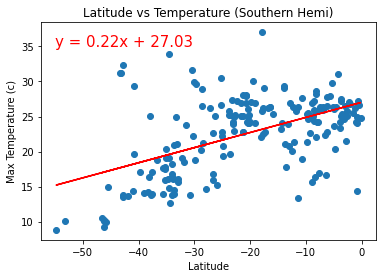

The r-squared is: 0.27531184109576956


In [21]:
# Linear regression on Southern Hemisphere

x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temperature (c)'
title = 'Latitude vs Temperature (Southern Hemi)'
x_loc = -55
y_loc = 35

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

## Discussion about the linear relationship:

### Northern Hemisphere:
Max temperature is inversely proportional to the latitude, ie. as we move higher (towards the north pole) the max temperature decreases. The r^2 is approximately 70%, implying that the majority of the variation in temperature can be explained by the change in latitude.


### Southern Hemisphere:
Max temperature is directly proportional to the latitude, ie. as we move higher (towards the equator) the max temperature increases. The r^2 is approximately 27% implying that the majority of the variation in temperature is not explained by the change in latitude.

The significant difference in r^2 value between the northern and southern hemispheres was not expected and requires further investigation and additional sampling.

### Humidity vs. Latitude Linear Regression Plot

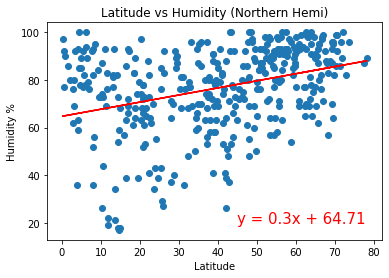

The r-squared is: 0.11544850962815995


In [39]:
# Northern Hemisphere

x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity %'
title = 'Latitude vs Humidity (Northern Hemi)'
x_loc = 45
y_loc = 20

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

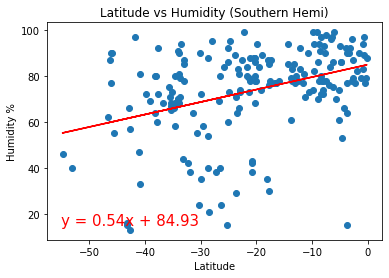

The r-squared is: 0.14152433674244494


In [38]:
# Southern Hemisphere

x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity %'
title = 'Latitude vs Humidity (Southern Hemi)'
x_loc = -55
y_loc = 15

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

## Discussion about the linear relationship:

### Both Hemispheres:
Humidity is directly proportional to the latitude for both hemispheres with similar slopes, ie. as we move higher (towards the north pole) the humidity increases. The r^2 is approximately under 15% in both hemispheres. This implies that in general, latitude is not a good measure of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

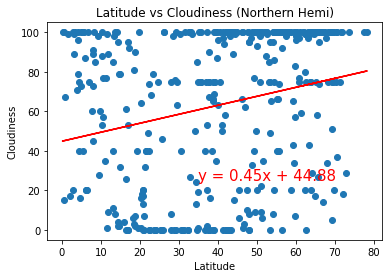

The r-squared is: 0.05812925405003339


In [29]:
# Northern Hemisphere

x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs Cloudiness (Northern Hemi)'
x_loc = 35
y_loc = 25

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

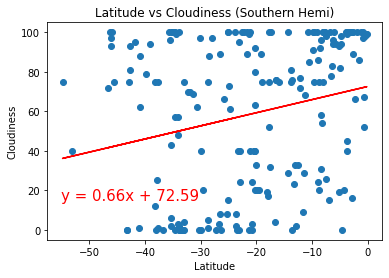

The r-squared is: 0.05419236320707244


In [31]:
# Southern Hemisphere

x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs Cloudiness (Southern Hemi)'
x_loc = -55
y_loc = 15

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

## Discussion about the linear relationship:

### Both Hemispheres:
Cloudiness appears to be directly proportional to the latitude for both hemispheres with similar slopes, ie. as we move higher (towards the north pole) the cloudiness increases. The r^2 is approximately under 6% in both hemispheres. This implies that latitude is a very poor measure for cloudiness and the proportional relationship could possibly be coincidental.

### Wind Speed vs. Latitude Linear Regression Plot

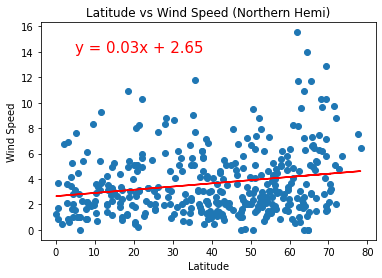

The r-squared is: 0.039193224216021096


In [33]:
# Northern Hemisphere

x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs Wind Speed (Northern Hemi)'
x_loc = 5
y_loc = 14

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

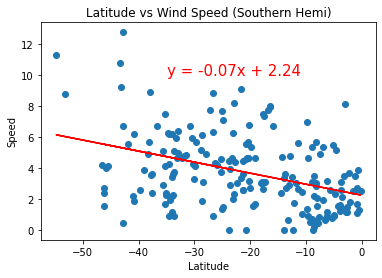

The r-squared is: 0.15703766626797838


In [37]:
# Southern Hemisphere

x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Speed'
title = 'Latitude vs Wind Speed (Southern Hemi)'
x_loc = -35
y_loc = 10

linreg(x_val,y_val,x_label,y_label,title,x_loc,y_loc)

## Discussion about the linear relationship:

### Northern Hemisphere:
Wind speed is directly proportional to the latitude, ie. as we move higher (towards the north pole) the wind speed increases. The r^2 is under 5%, implying that the latitude is a very poor measure for wind speed.


### Southern Hemisphere:
Wind speed is inversely proportional to the latitude, ie. as we move higher (towards the equator) the wind speed decreases. The r^2 is approximately 16% implying that latitude is not a good measure for wind speed.